---
jupytext:
  cell_metadata_filter: all, -hidden, -heading_collapsed, -run_control, -trusted
  notebook_metadata_filter: all, -jupytext.text_representation.jupytext_version, -jupytext.text_representation.format_version, -language_info.version, -language_info.codemirror_mode.version, -language_info.codemirror_mode, -language_info.file_extension, -language_info.mimetype, -toc
  text_representation:
    extension: .md
    format_name: myst
kernelspec:
  display_name: Python 3 (ipykernel)
  language: python
  name: python3
language_info:
  name: python
  nbconvert_exporter: python
  pygments_lexer: ipython3
nbhosting:
  title: 'Correction du TP régression Logistique'
  version: '1.0'
---

<div class="licence">
<span><img src="media/logo_IPParis.png" /></span>
<span>Lisa BEDIN<br />Pierre André CORNILLON<br />Eric MATZNER-LOBER</span>
<span>Licence CC BY-NC-ND</span>
</div>

# Modules python

Importer les modules pandas (comme `pd`) numpy (commme `np`) matplotlib.pyplot (comme `plt`) et statsmodels.formula.api (comme `smf`).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Régression logistique


## Importation des données

Importer les données `artere.txt` dans le DataFrame pandas `artere` \[`read_csv` de `numpy` \]. Sur Fun Campus le chemin est `data/artere.txt`. Outre l'age et la présence=1/absence=0 de la maladie cardio-vasculaire (`chd`) une variable qualitative à 8 modalités donne les classes d'age (`agegrp`)

In [2]:
artere = pd.read_csv("data/artere.txt", header=0, sep=" ")

## Nuage de points

Tracer le nuage de points avec `age` en abscisses et `chd` en ordonnées \[`plt.plot` \]

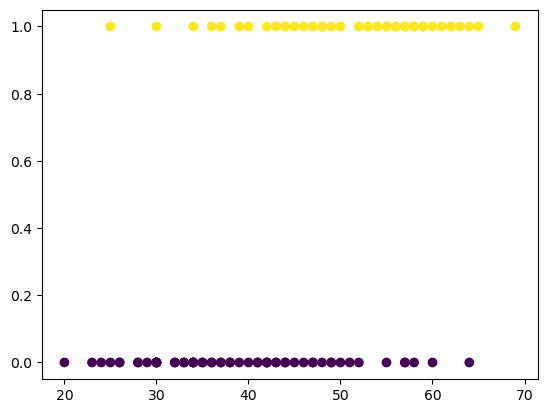

In [3]:
plt.scatter(x="age", y="chd", c="chd", data=artere)
plt.show()

## Régression logistique

Effectuer une régression logistique où `age` est la variable explicative et `chd` la variable binaire à expliquer. Stocker le résultat dans l'objet `modele` et

1.  effectuer le résumé de cette modélisation;

In [4]:
modele = smf.logit('chd~age', data=artere).fit()
print(modele.summary())

Optimization terminated successfully.
         Current function value: 0.536765
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    chd   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Apr 2025   Pseudo R-squ.:                  0.2145
Time:                        11:01:42   Log-Likelihood:                -53.677
converged:                       True   LL-Null:                       -68.331
Covariance Type:            nonrobust   LLR p-value:                 6.168e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3095      1.134     -4.683      0.000      -7.531      -3.088
age            0.1109      0.

Le modèle possède une log-vraisemblance de -53.677, le modèle avec uniquement la constante (appelé ici Null) à de son coté une log-vraisemblance de -68.331. L'ajout de l'âge permet un gain de vraisemblance assez conséquent.

2.  afficher l'attribut contenant les paramètres estimés par régression logistique.

In [5]:
print(modele.params)

Intercept   -5.309453
age          0.110921
dtype: float64


## Prévision et probabilités estimées

Afficher l'ajustement/prévision pour les données de l'échantillon via la méthode `predict` (sans arguments) sur le modèle `reg`. Que représente ce vecteur:

-   une probabilité d'être malade pour chaque valeur de l'age de l'échantillon (OUI on modélise la probabilité que $Y=1$ et dans l'échantillon $Y_i=1$ équivaut à $Y_i$ malade)
-   une probabilité d'être non-malade pour chaque valeur de l'age de l'échantillon (NON)
-   une prévision de l'état malade/non-malade pour chaque valeur de l'age de l'échantillon (NON, par défaut la fonction renvoie la probabilité)

In [6]:
modele.predict()

array([0.04347876, 0.05962145, 0.06615278, 0.07334379, 0.07334379,
       0.08124847, 0.08124847, 0.09942218, 0.09942218, 0.10980444,
       0.12112505, 0.12112505, 0.12112505, 0.12112505, 0.12112505,
       0.12112505, 0.14679324, 0.14679324, 0.16123662, 0.16123662,
       0.17680662, 0.17680662, 0.17680662, 0.17680662, 0.17680662,
       0.19353324, 0.19353324, 0.21143583, 0.21143583, 0.21143583,
       0.2305211 , 0.2305211 , 0.2305211 , 0.25078125, 0.25078125,
       0.27219215, 0.27219215, 0.29471199, 0.29471199, 0.31828021,
       0.31828021, 0.34281708, 0.34281708, 0.34281708, 0.34281708,
       0.36822381, 0.36822381, 0.36822381, 0.39438351, 0.39438351,
       0.39438351, 0.39438351, 0.42116276, 0.42116276, 0.448414  ,
       0.448414  , 0.47597858, 0.47597858, 0.47597858, 0.5036903 ,
       0.5036903 , 0.5036903 , 0.53137935, 0.53137935, 0.53137935,
       0.55887652, 0.55887652, 0.58601724, 0.61264546, 0.61264546,
       0.63861714, 0.63861714, 0.66380304, 0.68809096, 0.68809

Donner la prévision de l'état malade/non-malade avec l'indicatrice que $\hat p(x)>s$ où $s$ est le seuil classique de 0.5.

In [7]:
print(modele.predict()>0.5)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


# Simulation de données  Variabilité de $\hat \beta_2$


## Simulation

1.  Générer $n=100$ valeurs de $X$ uniformément entre 0 et 1.
2.  Pour chaque valeur $X_i$ simuler $Y_i$ selon un modèle logistique de paramètres $\beta_1=-5$ et $\beta_2=10$

\[créer une instance de générateur aléatoire `np.random.default_rng` et utiliser `rng.uniform` et `rng.binomial` \]

In [8]:
rng = np.random.default_rng(seed=123)
X = rng.uniform(size=100)
Y = np.copy(X)
for i,xi in enumerate(X):
    proba = 1 / (1 + np.exp( -(-5 + 10 * xi) ))
    Y[i]=rng.binomial(1, proba, 1)[0]
df = pd.DataFrame({"X" : X, "Y" : Y})

## Estimation

Estimer les paramètres $\beta_1$ et $\beta_2$

In [9]:
modele = smf.logit('Y~X', data=df).fit()
print(modele.params)

Optimization terminated successfully.
         Current function value: 0.353932
         Iterations 7
Intercept   -4.744570
X            8.995689
dtype: float64


## Variabilité de l'estimation

Refaire les deux questions ci-dessus 500 fois et constater par un graphique adapté la variabilité de $\hat \beta_2$.

Simulons 500 fois les données

In [10]:
hatbeta2 = []
for it in range(500):
    X = rng.uniform(size=100)
    Y = np.copy(X)
    for i,xi in enumerate(X):
        proba = np.exp(-5 + 10 * xi) / (1 + np.exp(-5 + 10 * xi))
        Y[i]=rng.binomial(1, proba, 1)[0]
    df = pd.DataFrame({"X" : X, "Y" : Y})
    modele = smf.logit('Y~X', data=df).fit()
    hatbeta2.append(modele.params[1])

Optimization terminated successfully.
         Current function value: 0.316123
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.350461
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.289634
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.436817
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.354037
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.316441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.229407
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273020
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.347750
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276951
  

C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(m

Optimization terminated successfully.
         Current function value: 0.384377
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.325224
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299845
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303959
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.255675
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277093
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299682
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.153615
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214890
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.368767
  

C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(m

Optimization terminated successfully.
         Current function value: 0.410739
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.359055
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.271565
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.317610
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.244902
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.411602
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.219690
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324689
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.239925
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208420
  

C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(m

Optimization terminated successfully.
         Current function value: 0.340794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303744
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.450599
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.312198
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.335400
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320321
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.258488
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210455
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.364352
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.277550
  

C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(m

Optimization terminated successfully.
         Current function value: 0.343765
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.229564
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308097
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303679
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.248705
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209724
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.328117
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.248430
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.226514
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324898
  

C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(m

Optimization terminated successfully.
         Current function value: 0.365127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321484
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.343721
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.267708
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297349
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.363570
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489730
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.331676
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.237590
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.325870
  

C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(m

Optimization terminated successfully.
         Current function value: 0.306935
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.309648
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.289040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.240509
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.357776
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.253082
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.327904
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398779
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.328154
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.466905
  

C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(m

Optimization terminated successfully.
         Current function value: 0.362974
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.452121
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.266148
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.331391
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276900
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.256553
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204044
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.209897
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.227118
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.315020
  

C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(modele.params[1])
C:\Users\cepe-s4-03\AppData\Local\Temp\ipykernel_8688\268998132.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hatbeta2.append(m

Et construisons un histogramme

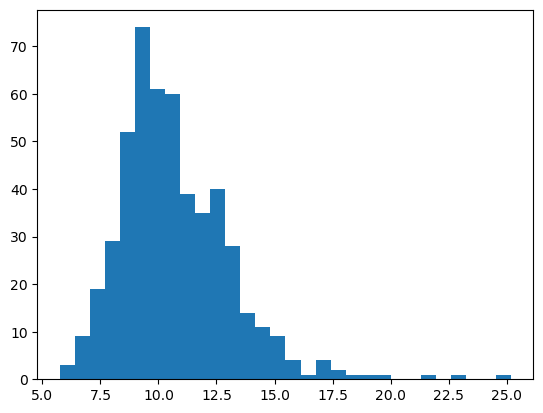

In [11]:
plt.hist(hatbeta2, bins=30)
plt.show()

# Deux régressions logistiques simples


## Importation des données

Importer les données `artere.txt` dans le DataFrame pandas `artere` \[`read_csv` de `numpy` \]. Sur Fun Campus le chemin est `data/artere.txt`. Outre l'age et la présence=1/absence=0 de la maladie cardio-vasculaire (`chd`) une variable qualitative à 8 modalités donne les classes d'age (`agegrp`)

In [12]:
artere = pd.read_csv("data/artere.txt", header=0, sep=" ")

## Deux régressions logistiques

1.  Effectuer une régression logistique simple où `age` est la variable explicative et `chd` la variable binaire à expliquer;
2.  Refaire la même chose avec la racine carrée de `age` comme variable explicative;

In [13]:
modele1 = smf.logit('chd~age', data=artere).fit()
modele2 = smf.logit('chd~I(np.sqrt(age))', data=artere).fit()

Optimization terminated successfully.
         Current function value: 0.536765
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.538140
         Iterations 6


## Comparaison

Ajouter au nuage de points les 2 ajustements (la droite et la "racine carrée") et choisir le meilleur modèle via un critère numérique. \[méthode `argsort` sur une colonne du DataFrame et `plt.plot` ; utiliser le résumé des modèles\]

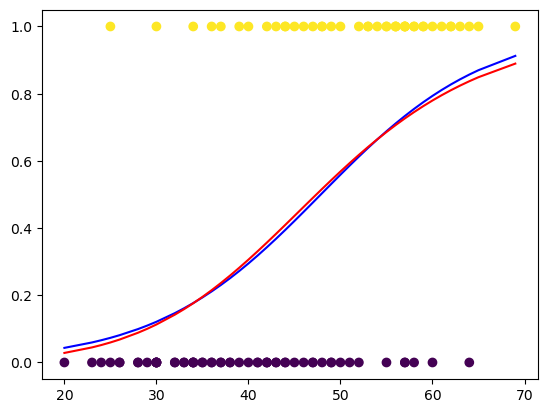

In [14]:
sel = artere['age'].argsort()
plt.scatter(x="age", y="chd", c="chd", data=artere)
plt.plot(artere.age.iloc[sel], modele1.predict()[sel], "b-", artere.age.iloc[sel], modele2.predict()[sel], "r-"  )
plt.show()

Comme les deux modèles ont le même nombre de variables explicatives nous pouvons comparer les log-vraisemblances et la plus élevée donne le meilleur modèle. C'est le modèle 1 qui l'emporte mais les log-vraisemblances sont assez comparables.